# Introduction/ Welcome word.

Hi! Thank you for the correction/ review!

My name is Tauras Aleksandravicius and this is my  **Data Science Module 3 Sprint 2 project.**

In this project I focused on **supervised Machine learning fundamentals.**

For this purpose I worked with a Stroke Prediction dataset, which was used in various ML competitions. [Link to the Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

<span style="font-size: larger;">**Project Problem:**</span>

I am employed as a Data Scientist at a healthcare company, where our primary objective is to develop a classifier capable of accurately predicting the likelihood of patients experiencing a stroke, based on their medical data. Our overarching goal is to excel in identifying individuals who are genuinely at risk of a stroke. We are in a position to accept <b> instances of false positives (incorrectly predicting a stroke when there isn't one), but false negatives (failing to predict a stroke that does occur) could have severe consequences.

<span style="font-size: larger;">**Proposed Solution:**</span>

Our approach involves leveraging Exploratory Data Analysis (EDA) and Machine Learning techniques to perform an in-depth analysis of patient data. We aim to design and develop a sophisticated predictive model that can determine whether a patient is at risk of having a stroke. This solution will be grounded in a thorough examination of the available data, utilizing advanced analytics and modeling strategies to achieve our goal.

# Project approach/ objectives.

My approach to this project follows a structured, step-by-step methodology grounded in
data science best practices. Each stage is thoughtfully designed to build upon the previous,
ensuring a cohesive and comprehensive solution:

1. **Data Preprocessing.**  After understanding the dataset, we clean and preprocess the data.


2. **Exploratory Data Analysis.** This step involves thorough understanding of the dataset, variables and structure. With selected features (based on domain knowledge and their interrelationships) this stage covers unearthing patterns, spotting anomalies, checking assumptions through visual and quantitative methods. It provides an in-depth understanding of the variables and their interrelationships.

3. **Machine Learning.** Main objective and most important part of this project. At second Sprint it's essential to understand flow of the ML projects and be able to deploy created model.

# Data Preprocessing.

This section involves:
* **Data Collection** (Importing necessary libraries, retrieving the dataset, reading the dataset in the Pandas DataFrame);
* **Data Understanding** (descriptive statistics, purpose of different features);
* **Data Cleaning.**

## Data Collection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from statsmodels.stats.proportion import proportions_ztest  # will be used for statistical inference
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, accuracy_score, recall_score, classification_report
from sklearn.ensemble import VotingClassifier

pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
df.head(1)

gender   age  hypertension  heart_disease ever_married work_type  \
id                                                                      
9046   Male  67.0             0              1          Yes   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                     
9046          Urban             228.69  36.6  formerly smoked       1

**Awesome, all data is present, let's go ahead.**

## Data Understanding.

Lets use ProfileReport from y-profilling package to understand features better.

In [3]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<b>Conclusions from Profile Report:

* No Duplicated rows;
* 3 Numeric Features, 1 Boolean, 7 Caetegorical.
* 5110 of observations.
* Gender - has 1 outlier value - ‘Other’
* Age - Mean 43 y/ o; Max age - 82 y/ o, There are values lower than 1 y/ o - need to investigate further if they are logic.
* Hypertension - 90% of entries did not have hypertension. 2 distinct classes. Imbalanced.
* Heart Disease - 95 % of entries did not have heart disease. 2 classes. Imbalanced.
* Ever Married - Boolean. More people were married than were not. Need encoding.
* Work Type - 5 Classes. Mostly Private workers. Need encoding.
* Residence Type - 2 classes. balanced. Need encoding.
* Avg Glucose Level - Numeric. Right skewed. Evaluate outlier influence.
* BMI - numeric. has missing data. need imputation. Evaluate outlier influence.
* Smoking Status - 4 classes. Need encoding.
* Stroke - 2 classes. Target class. Will need some kind of minority oversampling technique.

**Also, let's double check descriptive statistics from summary class.**

In [4]:
from tools import summary
summary(df).style.background_gradient(cmap='cividis')

Dataframe shape: (5110, 11)


**Conclusion:**
- Descriptive statistics confirm that numeric features are right skewed (except Age).
- It confirms all other assumptions, made in profile-report.


## Conclusion:
* Need to check if the rows with <1 age are real or fake.
* Need to deal with missing data in BMI field. I will perhaps go with the input of Median value (safest).
* Outlier influence of numeric columns will be handled by using non-linear models - gradient boosted trees, random forest and etc.
* Need to handle outlier in the gender column. (Other)

## Data Cleaning.

### First step - verify that rows with <1 y/o are valid.

In [5]:
df.age[df.age < 1].value_counts()

age
0.88    5
0.32    5
0.24    5
0.72    5
0.56    5
0.64    4
0.80    4
0.48    3
0.16    3
0.40    2
0.08    2
Name: count, dtype: int64

In [6]:
# df[df.age < 1] # I've commented this out, because it will be way too long to display in github.
df[df.age < 1].work_type.value_counts()

work_type
children    43
Name: count, dtype: int64

<b> Ok. It seems that this was not a mistake.

### Second Step - drop random gender value.

In [7]:
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [8]:
df.shape

(5109, 11)

# Exploratory Data Analysis

<b> Plan is as follows:
* Analyze categorical features vs target feature.
* Analyze pair-wise features vs target feature.
* Analyze correlation between target feature and predictors.
* Test some statistical hypothesis.

### First part - Analyze Cat features vs target feature. 

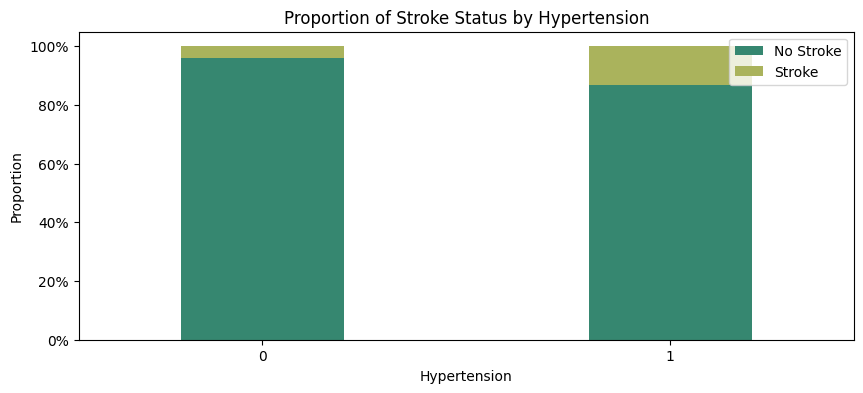

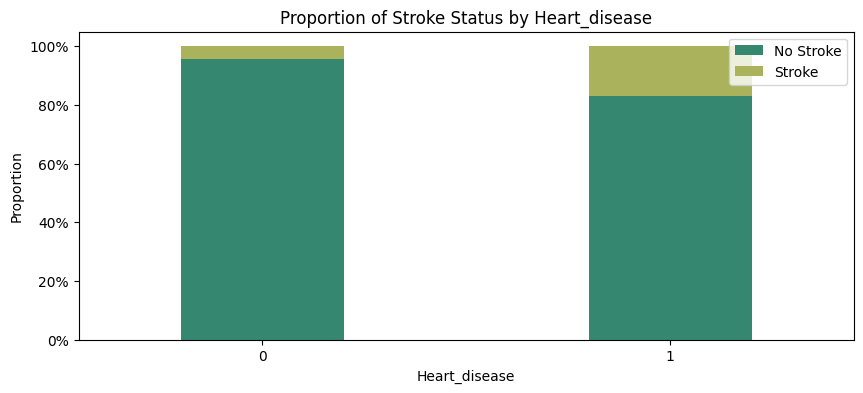

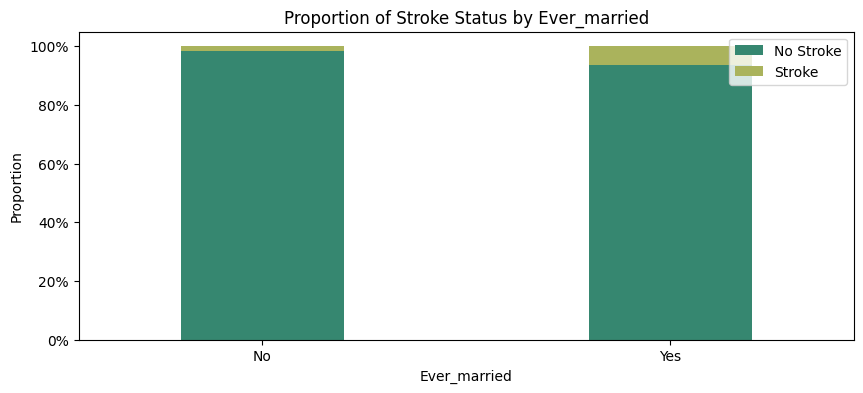

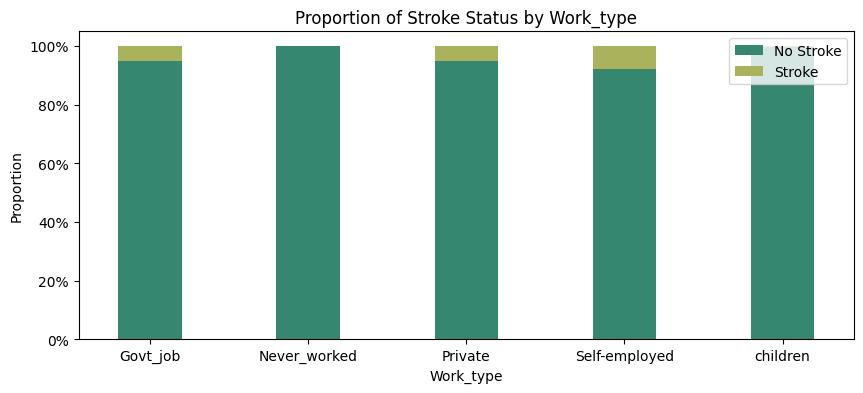

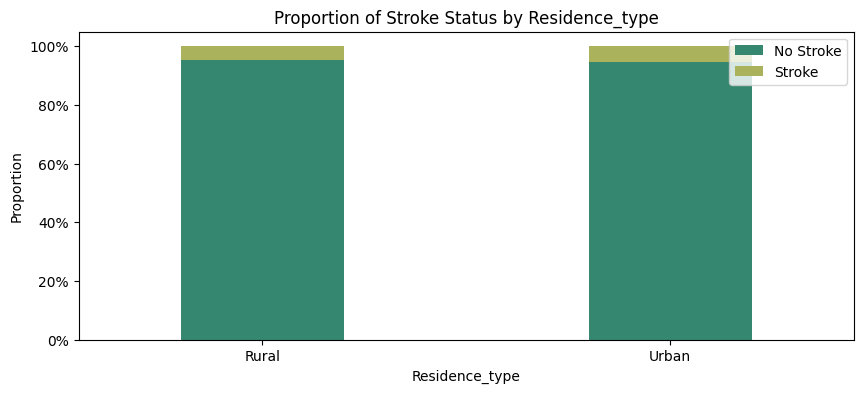

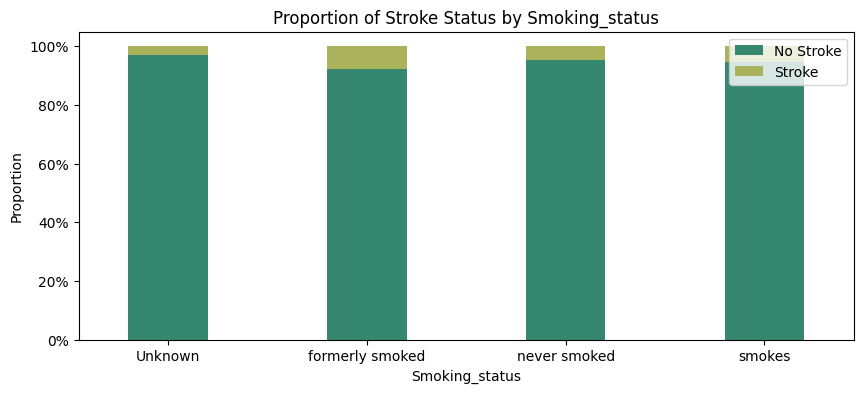

In [9]:
dfcat = df.copy()
dfcat['hypertension'] = dfcat.hypertension.astype('object')
dfcat['heart_disease'] = dfcat.heart_disease.astype('object')
for column in dfcat.select_dtypes(include='object').columns:
    if column != 'stroke':
        ct_norm = pd.crosstab(df[column], df['stroke'], normalize='index')
        palette = sns.color_palette("gist_earth", n_colors=ct_norm.shape[1])
        ct_norm.plot(kind='bar', stacked=True, figsize=(10, 4), color=palette, width=0.4)
        plt.title(f'Proportion of Stroke Status by {column.capitalize()}')
        plt.xlabel(column.capitalize())
        plt.ylabel('Proportion')
        plt.xticks(rotation=0)
        plt.legend(['No Stroke', 'Stroke'], loc='upper right')
        
        plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
        
        plt.show()

<b> Interesting! Possible insights:
* Ever Married people seem to be more related to Stroke.
* Self-Employed people seem to have more associations to Stroke rather than others workers. Non-workers seem to have fewer issues with Stroke.
* People who formerly smoked seem to have more associations with Stroke.
* Presence of Hypertension and Heart Disease also seem to be related to Stroke.

### Second part - Analyze Num feature pairs vs target feature. 

In [10]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

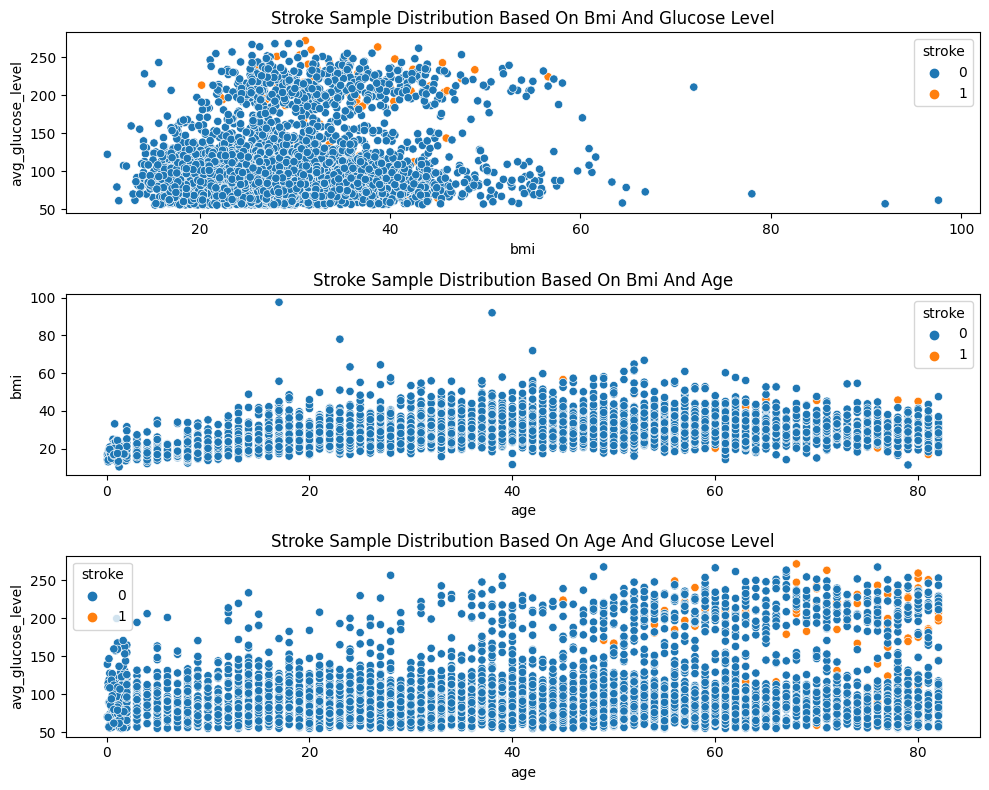

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=df['bmi'], y=df['avg_glucose_level'], hue=df['stroke'])
plt.subplot(3, 1, 2)  # Second plot
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['stroke'])
plt.subplot(3, 1, 3)  # Third plot
plt.title('Stroke Sample Distribution Based On Age And Glucose Level')
sns.scatterplot(x=df['age'], y=df['avg_glucose_level'], hue=df['stroke'])
plt.tight_layout()
plt.show()

Interesting!
Out of first sight two groups can be established:
- Group 1 - Aged > 50 y/o, BMI > 25 and Blood Glucose Level > 150.
- Group 2 - Opposite.

 Group 1 individuals seem to be more likely to experience Stroke.

### Third part - correlation analysis between Numeric Features and Target Feature.

Since numeric features have skewed distributions and we test relatonship between binary variable (stroke) and predictors here we will use Spearman's correlation coefficient.

In [12]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']

spearman_corr = df[numerical_cols].corr(method='spearman')

spearman_corr

age  avg_glucose_level       bmi    stroke
age                1.000000           0.145360  0.375441  0.249530
avg_glucose_level  0.145360           1.000000  0.114633  0.082585
bmi                0.375441           0.114633  1.000000  0.055398
stroke             0.249530           0.082585  0.055398  1.000000

Conclusion!
* There is weak positive correlation between age and stroke occurence. This suggests that as age increases, the likelihood of experiencing a stroke also increases, indicating age as a significant factor in stroke risk.
* BMI shows a relatively strong positive correlation with age (0.375441) compared to its correlation with stroke (0.055398). This indicates that as people age, there is a tendency for BMI to increase, but the direct correlation between BMI and stroke occurrence is weaker.
* Avg. Glucose Level and Stroke has relatively low correlation.

### Fourth part - statistical inference.

At the first part of EDA we observed interesting phenomenon. It seemed that people who were married had higher chances of stroke.
However this could have appeared due to chance and very different sample sizes. <br>
Here we will try to be <b> 95 % confident about our inference and compare these two samples.

In [13]:
stroke_married = df[df['ever_married'] == 'Yes']['stroke']
stroke_not_married = df[df['ever_married'] == 'No']['stroke']

successes_married = [stroke_married.sum(), stroke_not_married.sum()]

nobs_married = [stroke_married.count(), stroke_not_married.count()]

z_stat_married, p_value_married = proportions_ztest(count=successes_married, nobs=nobs_married)

z_stat_married, p_value_married


(7.740939330349397, 9.868498378261487e-15)

<b> Conclusion:
* Individuals who have ever been married exhibit a statistically significant difference in stroke occurrence compared to those who have not been married.
* The analysis reveals a meaningful association between marital status and the likelihood of experiencing a stroke.
* This significant correlation suggests that social and relational factors, such as marital status, may play a role in stroke risk.

# Data pre-processing.


Ok. There has been only 1 transformation done so far - dropping 'Other' from the gender column and all others planned:
* Impute BMI column by median value;
* Scale numeric features;
* Encode categorical features.

Since there was only 1 occurance of 'Other' at the Gender, for the v1 model let's just assume that it was one-time occurance and it was due to randomness. All other steps are critical to include into feature transformation pipelines.

## Plan is as follows:
* Split dataset into 3 datasets with stratified split, ensuring that test data will have equal share of a target class;
* Upsample training data to have equal share of target class. This can help model do not be biased towards the majority class.
* Define column transformer, which ideally will handle all possible real-world cases in test data.
  

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(df, df["stroke"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

split_train = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in split_train.split(strat_train_set, strat_train_set["stroke"]):
    strat_train_split = strat_train_set.iloc[train_index].copy()
    strat_val_split = strat_train_set.iloc[val_index].copy()


In [15]:
X_train = strat_train_set.drop("stroke", axis=1)
y_train = strat_train_set["stroke"].copy()

X_val = strat_val_split.drop("stroke", axis=1)
y_val = strat_val_split["stroke"].copy()

X_test = strat_test_set.drop("stroke", axis=1)
y_test = strat_test_set["stroke"].copy()


### Next, Let's upsample minority class.

In [16]:
le = LabelEncoder()
X_train['gender'] = le.fit_transform(X_train['gender'])
X_train['ever_married'] = le.fit_transform(X_train['ever_married'])
X_train['work_type'] = le.fit_transform(X_train['work_type'])
X_train['Residence_type'] = le.fit_transform(X_train['Residence_type'])
X_train['smoking_status'] = le.fit_transform(X_train['smoking_status'])

X_train['bmi'] = SimpleImputer(strategy='median').fit_transform(X_train[['bmi']])


In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [18]:
y_train_res.value_counts()

stroke
0    4130
1    4130
Name: count, dtype: int64

### Further, let's define Column Transformer applying our EDA knowledge.

In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [20]:
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'heart_disease', 'hypertension']
numerical_columns = ['bmi', 'age', 'avg_glucose_level']

In [21]:
ct = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='median')),
            ('scale', StandardScaler())
        ]), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ])

# ML Modelling.

Plan is as follows:
- Create baseline models;
- Perform cross-validation to prevent overfitting;
- Improve models with hyperparameter tuning.
- Try Model Ensemble;
- Deploy Model;

## Model Evaluation Metrics:
Since we are dealing with medical diagnosis, our focus will be on the True Positive Rate, also known as recall. Essentially, we can tolerate errors by conducting further examinations for False Positives, but we cannot afford False Negatives.

## Models:
For this project I will try 4 different ML models - Random Forest, SVC, Logistic Regression, XGB.

## Feature Engineering:
There could be lots of diferent variants of feature engineering ( making bins, creating ratio's, use logarithmic features or etc. ) however, to my understanding these will not translate to real world and can even introduce some falsy bias towards models. In this case, I decided to not perform feature engineering for this project.

## Creating models using Pipelines.

In [22]:
rf_pipeline = Pipeline(steps=[('ct', ct), ('RF', RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps=[('ct', ct), ('SVM', SVC(probability=True, random_state=42))])
logreg_pipeline = Pipeline(steps=[('ct', ct), ('LR', LogisticRegression(random_state=42))])
xgb_pipeline = Pipeline(steps=[('ct', ct), ('XGB', XGBClassifier(random_state=42, n_estimators=500))])


<b> Let's now evaluate my models with 5 Folds cross validation. My main scoring metric will be recall on Class 1.

In [23]:
rf_cv = cross_val_score(rf_pipeline, X_train_res, y_train_res, cv=5, scoring='recall')
svm_cv = cross_val_score(svm_pipeline, X_train_res, y_train_res, cv=5, scoring='recall')
logreg_cv = cross_val_score(logreg_pipeline, X_train_res, y_train_res, cv=5, scoring='recall')
xgb_cv = cross_val_score(xgb_pipeline, X_train_res, y_train_res, cv=5, scoring='recall')

In [24]:
print('Mean recall scores:')
print('Random Forest mean :', np.mean(rf_cv))
print('SVM mean :', np.mean(svm_cv))
print('Logistic Regression mean :', np.mean(logreg_cv))
print('XGB mean :', np.mean(xgb_cv))


Mean recall scores:
Random Forest mean : 0.960048426150121
SVM mean : 0.8956416464891042
Logistic Regression mean : 0.8278450363196127
XGB mean : 0.9631961259079903


<b> Nice! XGB seems to have the best mean recall out of all! However, I need to be aware that results might be inflated, because training data had balanced data. Let's take a look at how does it handle in different folds.

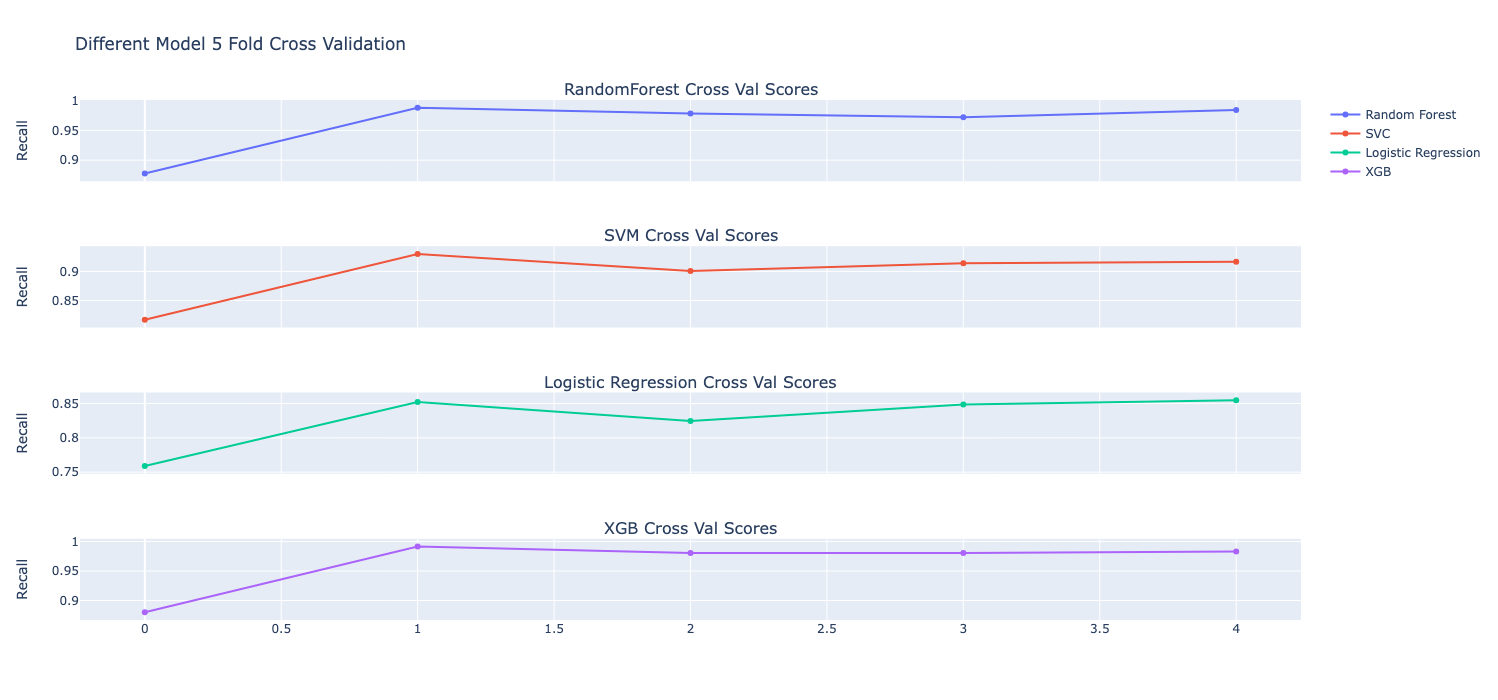

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('RandomForest Cross Val Scores',
                                                                     'SVM Cross Val Scores',
                                                                    'Logistic Regression Cross Val Scores','XGB Cross Val Scores'))
fig.add_trace(
    go.Scatter(x=list(range(0,len(rf_cv))),y=rf_cv,name='Random Forest'),
    row=1, col=1)
fig.add_trace(
    go.Scatter(x=list(range(0,len(rf_cv))),y=svm_cv,name='SVC'),
    row=2, col=1)
fig.add_trace(
    go.Scatter(x=list(range(0,len(rf_cv))),y=logreg_cv,name='Logistic Regression'),
    row=3, col=1)
fig.add_trace(
    go.Scatter(x=list(range(0,len(rf_cv))),y=xgb_cv,name='XGB'),
    row=4, col=1)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="Recall")

fig.show()

<b> Okay! It seems that all models perform really well. 
However, XGB seems to have best recall and stability out of 4. Let's proceed with XGBoost.

Classification Report for XGBoost on Validation Data:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       827
           1       0.59      0.40      0.48        42

    accuracy                           0.96       869
   macro avg       0.78      0.70      0.73       869
weighted avg       0.95      0.96      0.95       869



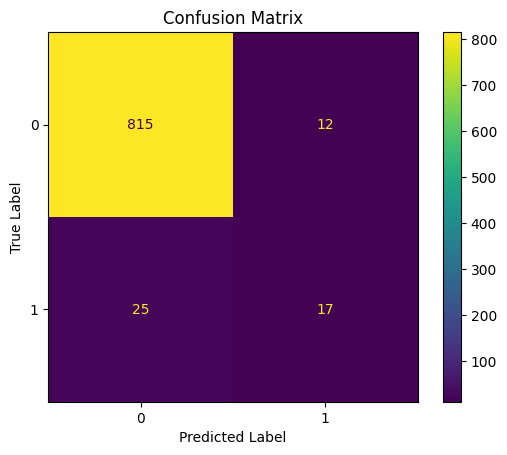

In [26]:
xgb_pipeline.fit(X_train_res, y_train_res)

y_pred_val = xgb_pipeline.predict(X_val)

print("Classification Report for XGBoost on Validation Data:")
print(classification_report(y_val, y_pred_val))

conf_matrix = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<b> Okay! Several conclusions:
* Models performance during cv was overinflated because of a SMOTE;
* Current model picks 40% of Class 1 cases.


## Awesome! Baseline model defined! Let's proceed with hyperparameter search.

In [27]:
# # Commented out, because it takes some time to perfort it.

# param_grid = {
#    'XGB__max_depth': [3, 5],
#    'XGB__learning_rate': [0.05, 0.1],
#    'XGB__n_estimators': [100, 200],
#    'XGB__gamma': [0, 0.1],
#    'XGB__min_child_weight': [1, 10],
#    'XGB__subsample': [0.7, 1.0],
#    'XGB__colsample_bytree': [0.7, 1.0]
# }

# scoring = make_scorer(recall_score, pos_label=1)

# grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring=scoring, cv=3, verbose=2, n_jobs=-1)
# grid_search.fit(X_train_res, y_train_res)

# best_params = grid_search.best_params_
# best_params

In [30]:
xgb_pipeline = Pipeline(steps=[
    ('ct', ct),
    ('XGB', XGBClassifier(
        random_state=42,
        n_estimators=100,
        colsample_bytree=1.0,
        gamma=0.1,
        learning_rate=0.1,
        max_depth=5,
        min_child_weight=1,
        subsample=0.7,
        scale_pos_weight=sum(y_train==0)/sum(y_train==1)
    ))
])

xgb_pipeline.fit(X_train_res, y_train_res)

y_pred = xgb_pipeline.predict(X_val)
y_score = xgb_pipeline.predict_proba(X_val)[:,1]

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86       827
           1       0.15      0.81      0.25        42

    accuracy                           0.77       869
   macro avg       0.57      0.79      0.56       869
weighted avg       0.95      0.77      0.83       869



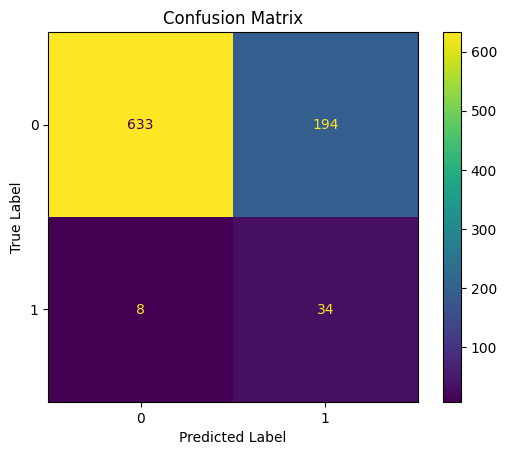

In [31]:
conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<b> Conclusion:
* Models got a lot better, mainly due to XGB hyperparameter scale_pos_weight.
* Now model correctly catches 81 % of Class 1, however it's not very precise, because of a lot False Positive samples.


### Model Ensembles.
<b> Let's now proceed with model ensembles. </b> Model ensembles are highly powerful because they combine the strengths of several machine learning algorithms. Through a process known as voting, they aggregate the predictions from multiple models to decide on the final label. This approach often leads to improved accuracy and robustness in predictions compared to using a single model.

In [32]:
ensemble = VotingClassifier(
    estimators=[
        ('RF', rf_pipeline),
        ('SVM', svm_pipeline),
        ('LR', logreg_pipeline),
        ('XGB', xgb_pipeline)
    ],
    voting='soft',
    n_jobs=-1 
)

ensemble.fit(X_train_res, y_train_res)

VotingClassifier(estimators=[('RF',
                              Pipeline(steps=[('ct',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scale',
                                                                                                 StandardScaler())]),
                                                                                ['bmi',
                                                                                 'age',
                                                                                 'avg_glucose_level']),
                                                                               ('cat',
                                                                                OneHotEncoder(handle_unknown='ignore'),
                                                                                ['gender',
                                                                                 'work_type',
                                                                                 'Residence_type',
                                                                                 'smoking_status',
                                                                                 'heart_disease',
                                                                                 'hypertensio...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))]))],
                 n_jobs=-1, voting='soft')

In [38]:
y_pred = ensemble.predict(X_val)

report = classification_report(y_val, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.98      0.82      0.89       827
           1       0.16      0.71      0.27        42

    accuracy                           0.81       869
   macro avg       0.57      0.77      0.58       869
weighted avg       0.94      0.81      0.86       869



Interesting! The classifier hasn't improved significantly! It might be due to case that these models do not complement each other weaknesses. 

Let's give up on Voting Classifier.

### Finally! We will apply all what I've done to final prediction!

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       730
           1       0.13      0.73      0.23        37

    accuracy                           0.76       767
   macro avg       0.56      0.74      0.54       767
weighted avg       0.94      0.76      0.83       767



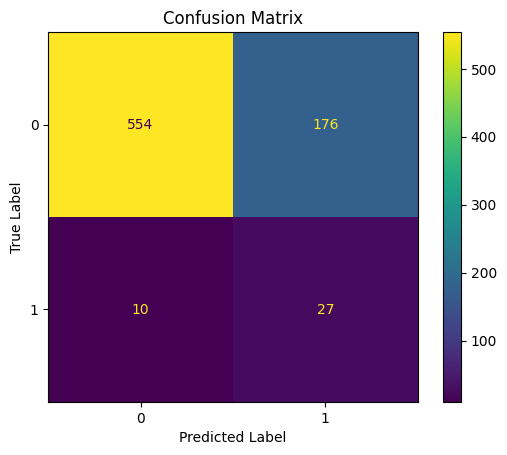

In [143]:
y_pred = xgb_pipeline.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show();

<b> Notes on Final Model:
* Models Accuracy on Final data is 76 % with a recall (True Positive Rate) of 73 %.
* There might be a lot of opportunities ahead to find better hyperparameters or models, however it's very time-consuming.
* Current model might be already useful, since it captures almost 3/4 of all True Positve Cases.

## Deploying Model.

Main goal of this - make model accessible for making predictions through an HTTP request.
Plan is as follows:
* Export Model using joblib library.
* Create a Flask application with /predict endpoint. Inputs will be containing input data for predictions.
* Create a separate script to test app.

In [141]:
# from joblib import dump

# dump(xgb_pipeline, 'model.joblib')


['model.joblib']

# Conclusion

All of the EDA of all dataset has led to better understanding of likelihood of stroke phenomenon. This lead to the strategy for column transformation and machine learning modelling. I decided to tune model and approach best precision-recall ratio and focused all analysis and modelling towards better Recall of Class 1. 

Here I will list things that could have been done to improve existing models and its performance:
* Advanced Feature Engineering.
* SHAP for models interpretability;
* Hyperparameter tuning of more ML models;
* Feature selection.